## Plotting notebook

In [8]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [83]:
import pandas as pd

## Validating M/D/1 Queue Theory 

In [16]:
df = pd.read_csv('result_test.csv', usecols = ["Request Rate","Inferences/Second", "Server Queue"])
print(df)

   Request Rate  Inferences/Second  Server Queue
0            66            63.4895          2161
1            99            96.7787          3181
2           132           128.9970          3335
3           165           160.4810          3555
4           198           194.6730          4408
5           231           229.9470          3604
6           264           261.0010         10195
7           297           297.4990         12746


In [10]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 27.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [11]:
import matplotlib.pyplot as plt

In [65]:
df.columns= df.columns.str.strip()
max_serv_rate = 330
df["Rho Values"] = df['Request Rate']/max_serv_rate

In [66]:
#theory queue time
theory_q_time = []
for rho in df["Rho Values"]:
    val = (10**6)*rho/(2*max_serv_rate*(1-rho))
    theory_q_time.append(val)
df['Theory Queue Time']=theory_q_time

In [67]:
#for value in rho_values:
#    print(value)
print(df)

   Request Rate  Inferences/Second  Server Queue  Rho Values  \
0            66            63.4895          2161         0.2   
1            99            96.7787          3181         0.3   
2           132           128.9970          3335         0.4   
3           165           160.4810          3555         0.5   
4           198           194.6730          4408         0.6   
5           231           229.9470          3604         0.7   
6           264           261.0010         10195         0.8   
7           297           297.4990         12746         0.9   

   Theory Queue Time  
0         378.787879  
1         649.350649  
2        1010.101010  
3        1515.151515  
4        2272.727273  
5        3535.353535  
6        6060.606061  
7       13636.363636  


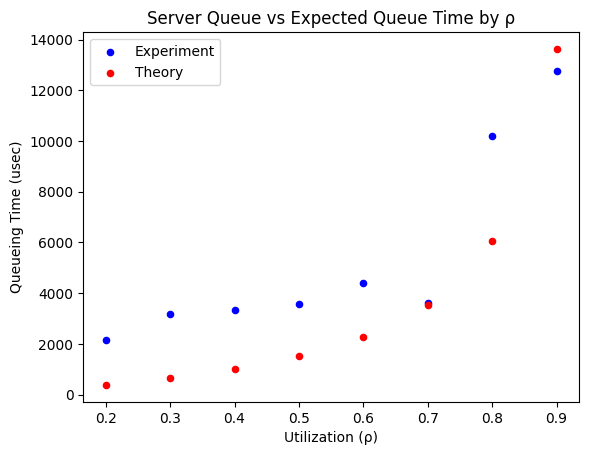

In [70]:
# Create the plot
fig, ax = plt.subplots()

df.plot.scatter(x='Rho Values', y='Server Queue', color='blue', label='Experiment', ax=ax)
df.plot.scatter(x='Rho Values', y='Theory Queue Time', color='red', label='Theory', ax=ax)
# Add legend
ax.set_title('Server Queue vs Expected Queue Time by ρ')
ax.set_xlabel('Utilization (ρ)')
ax.set_ylabel('Queueing Time (usec)')
ax.legend()
plt.legend()

# Show the plot
plt.show()

## Validating Batches as Bulk Queues

In [72]:
import glob

Combining all batch*.csv files to one file: batch_results.csv

In [87]:

all_batches = []

for filepath in sorted(glob.glob("batch*.csv")):
    batch_name = filepath.replace(".csv", "") 
    batch_name = batch_name.replace("batch", "")
    df = pd.read_csv(filepath)
    df["batch size"] = batch_name
    all_batches.append(df)

combined = pd.concat(all_batches, ignore_index=True)
combined.to_csv("batch_results.csv", index=False)

In [90]:
df = pd.read_csv("batch_results.csv", usecols= ["batch size","Server Compute Infer", "Server Queue", "Server Compute Input", "Server Compute Output"])
print(df)

   Server Queue  Server Compute Input  Server Compute Infer  \
0           137                   156                  6011   
1           459                   822                  7368   
2        967909                  1083                  8323   
3       1250052                  1195                  9394   
4       5489924                  1233                 10840   
5           241                   495                  5808   
6           123                   695                  5600   
7           200                   572                  6010   

   Server Compute Output  batch size  
0                     25           1  
1                     15          10  
2                     21          12  
3                     20          14  
4                     28          16  
5                     24           4  
6                     26           6  
7                     15           8  


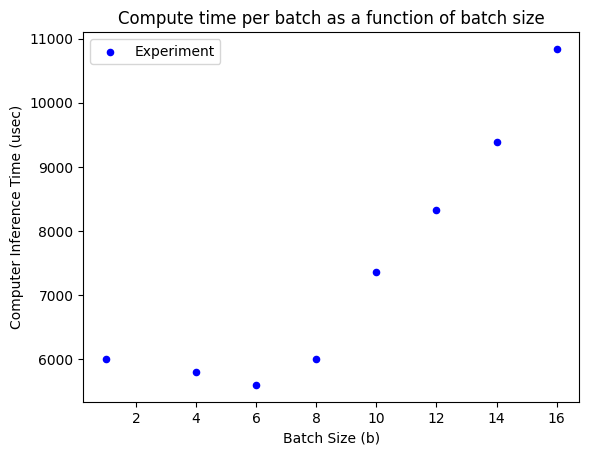

In [89]:
# Create the plot
fig, ax = plt.subplots()

df.plot.scatter(x='batch size', y='Server Compute Infer', color='blue', label='Experiment', ax=ax)
# Add legend
ax.set_title('Compute time per batch as a function of batch size')
ax.set_xlabel('Batch Size (b)')
ax.set_ylabel('Compute Inference Time (usec)')
ax.legend()
plt.legend()

# Show the plot
plt.show()

In [91]:
df["Total Compute Time"] = df['Server Compute Infer'] + df['Server Compute Input']+df['Server Compute Output']
print(df)

   Server Queue  Server Compute Input  Server Compute Infer  \
0           137                   156                  6011   
1           459                   822                  7368   
2        967909                  1083                  8323   
3       1250052                  1195                  9394   
4       5489924                  1233                 10840   
5           241                   495                  5808   
6           123                   695                  5600   
7           200                   572                  6010   

   Server Compute Output  batch size  Total Compute Time  
0                     25           1                6192  
1                     15          10                8205  
2                     21          12                9427  
3                     20          14               10609  
4                     28          16               12101  
5                     24           4                6327  
6                  

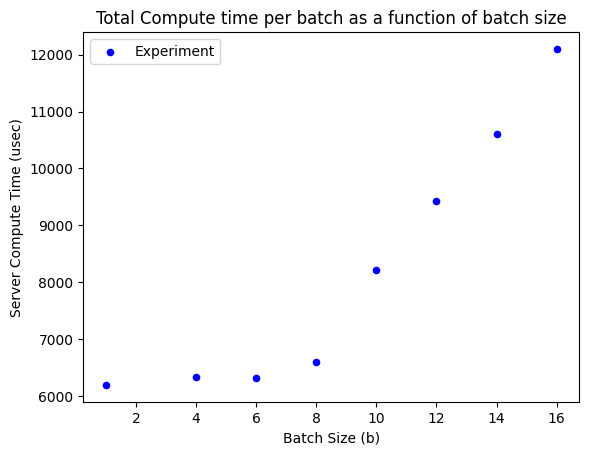

In [92]:
# Create the plot
fig, ax = plt.subplots()

df.plot.scatter(x='batch size', y='Total Compute Time', color='blue', label='Experiment', ax=ax)
# Add legend
ax.set_title('Total Compute time per batch as a function of batch size')
ax.set_xlabel('Batch Size (b)')
ax.set_ylabel('Server Compute Time (usec)')
ax.legend()
plt.legend()

# Show the plot
plt.show()

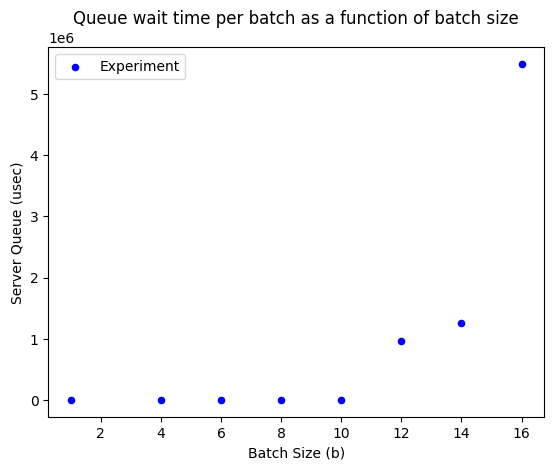

In [93]:
# Create the plot
fig, ax = plt.subplots()

df.plot.scatter(x='batch size', y='Server Queue', color='blue', label='Experiment', ax=ax)
# Add legend
ax.set_title('Queue wait time per batch as a function of batch size')
ax.set_xlabel('Batch Size (b)')
ax.set_ylabel('Server Queue (usec)')
ax.legend()
plt.legend()

# Show the plot
plt.show()